Notation:

- $nr$ = number of rooms
- $nc$ = number of (place) cells
- $A$ = Atlas, $A[r, c]$ encodes the position of cell $c$ in room $r$.

In [191]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

def create_atlas(nr, nc, diam=1.0):

    A = np.zeros((nr,nc))
    P = np.zeros((nr,nc)).astype(int)
    x = np.linspace(0., diam, num=nc)

    A[0] = x
    P[0] = np.arange(nc)
    for i in range(1,nr):
        perm = np.random.permutation(nc)
        A[i] = x[perm]
        P[i] = np.argsort(perm)
        
    return A, P


def bump(x, sigma=0.05):
    """
    Gaussian bump...
    """
    a = 1./(sigma*np.sqrt(2*np.pi))
    c = sigma
    y = np.exp( - a*x**2/(2*c**2))
    return y

def unscramble(z, P):
    nr, nc = P.shape
    U = np.zeros((nr,nc))
    for i in range(nr):
        U[i] = z[P[i]]
        
    return U

def place_code(x, room, atlas, sigma=0.05):

    z = bump(atlas[room] - x, sigma)
    return z



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


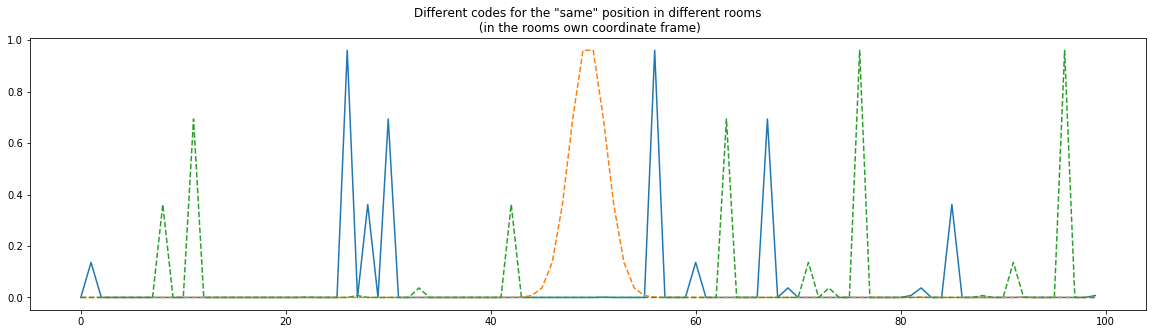

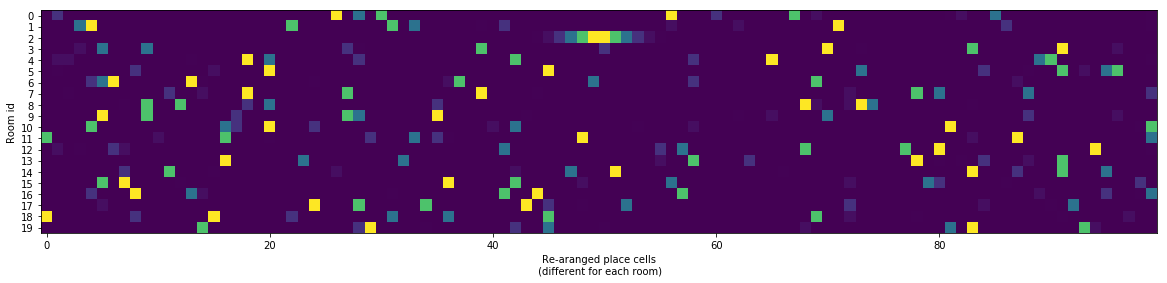

In [192]:


nr = 20
nc = 100

A, P = create_atlas(nr, nc, diam=1.)


plt.figure(figsize=(20,5))
plt.title("Different codes for the \"same\" position in different rooms\n (in the rooms own coordinate frame)")


z = place_code(x=0.5, room=2, atlas=A)
plt.plot(z, linestyle="-", label="place code in room 2")
plt.plot(place_code(x=0.5, room=0, atlas=A), linestyle="--", label="place code in room 0")
plt.plot(place_code(x=0.5, room=1, atlas=A), linestyle="--", label="place code in room 1")
plt.show()


plt.figure(figsize=(20,5))
plt.imshow(unscramble(z, P))
plt.yticks(range(nr));
plt.ylabel("Room id");
plt.xlabel("Re-aranged place cells\n (different for each room)");


